# Part I - Introduction

### Competition
This Jupyter Notebook is aim to Present the solution to The Google's quest labelling challenge on Kaggle.

Machine can understand numbers easily, but they are hard to capture subjective opinions of Q&A ......

### Environment
TensorFlow-gpu: 2.3.0

CUDA: 10.1

CuDNN: 7.6

# Part II -  Data Analysis

### Load Data

**I downloaded the training and testing data from https://www.kaggle.com/c/google-quest-challenge/data.**

In [48]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

**Let's look at the shape of the data. It looks like the data size is not overwhelming.**

In [3]:
print('train:', train_data.shape)
print('test:', test_data.shape)

train: (6079, 41)
test: (476, 11)


**Let's peek into what we need to submit. It seems like we are going to predict 30 values for each of the question-answer pair, and they are numerical values in [0,1].**

In [9]:
sample_submission.head()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,...,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308
1,46,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,...,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448
2,70,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,...,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673
3,132,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,...,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401
4,200,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,...,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074


**The training data has 41 columns: 1 id column, 10 features, and 30 targets.**

In [10]:
train_data.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


**We only need to choose important features such as question_title, question_body and answer.**

In [2]:
feature_cols = train_data.columns[[1,2,5]]
target_cols = train_data.columns[11:]
print('feature columns:\n', feature_cols)
print('target columns:\n', target_cols)

feature columns:
 Index(['question_title', 'question_body', 'answer'], dtype='object')
target columns:
 Index(['question_asker_intent_understanding', 'question_body_critical',
       'question_conversational', 'question_expect_short_answer',
       'question_fact_seeking', 'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_r

### Analyze Data

**It's important to know the distribution of the labels. We can see that some labels have pure 0 values and we need to take care of that when we do evaluations to avoid NaN. We can also see that the label distributions are very different.**

d:\ml\ml_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


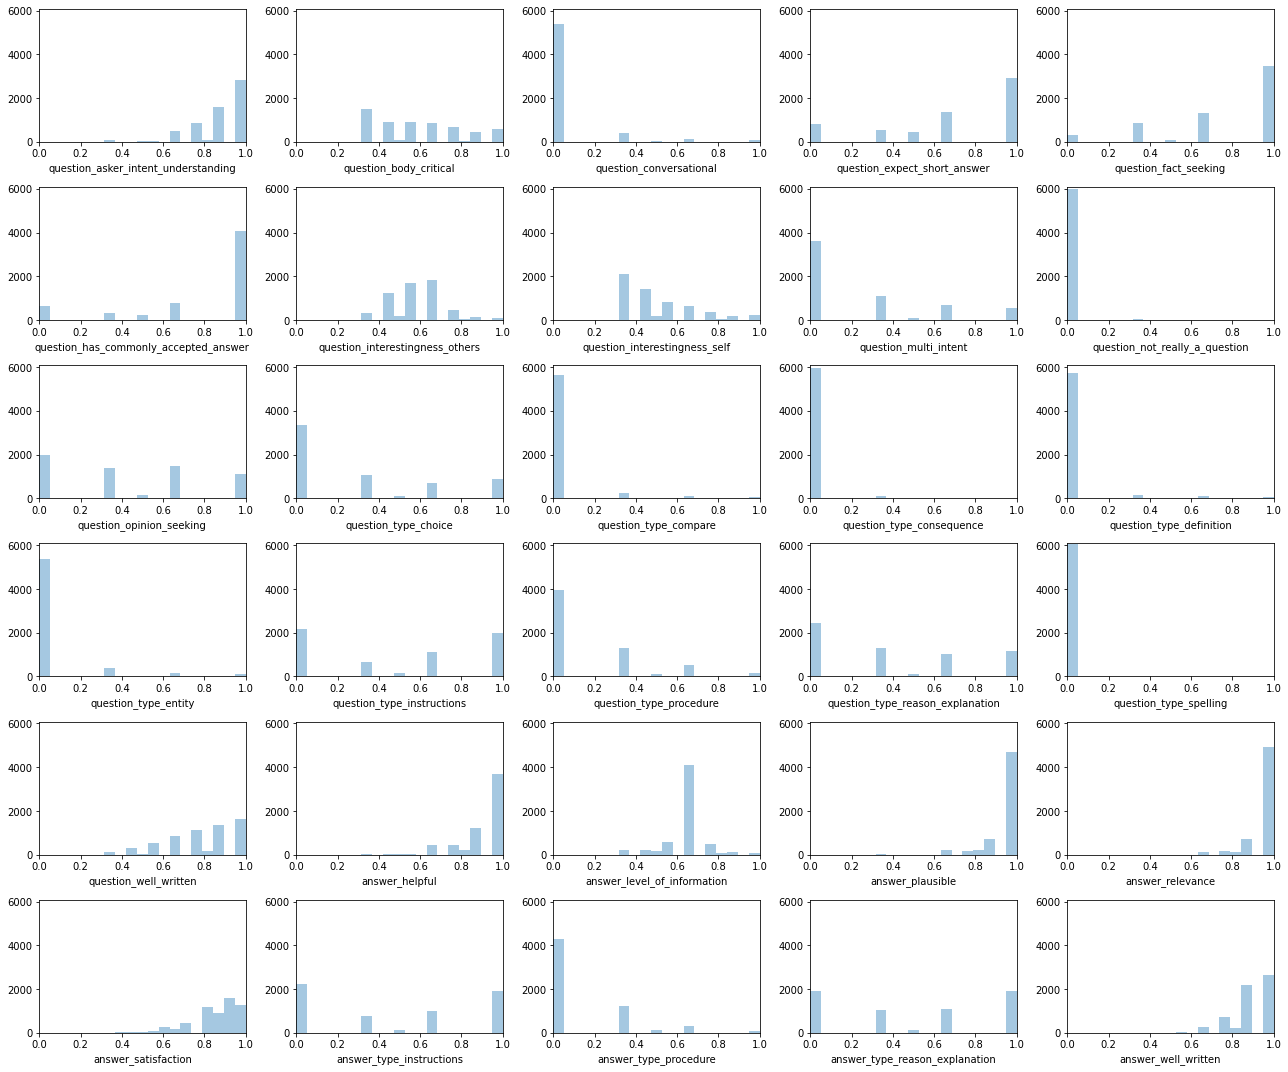

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 5, figsize=(18, 15))
axes = axes.ravel()
bins = np.linspace(0, 1, 20)

for i, col in enumerate(target_cols):
    ax = axes[i]
    sns.distplot(train_data[col], label=col, kde=False, bins=bins, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 6079])
    
plt.tight_layout()
plt.show()
plt.close()

**Now it's time to examine the features. The most crucial features are question_title, question_body, answer. Since many models have requirements on the input length, we should know the length of these features.**

d:\ml\ml_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ml\ml_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ml\ml_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

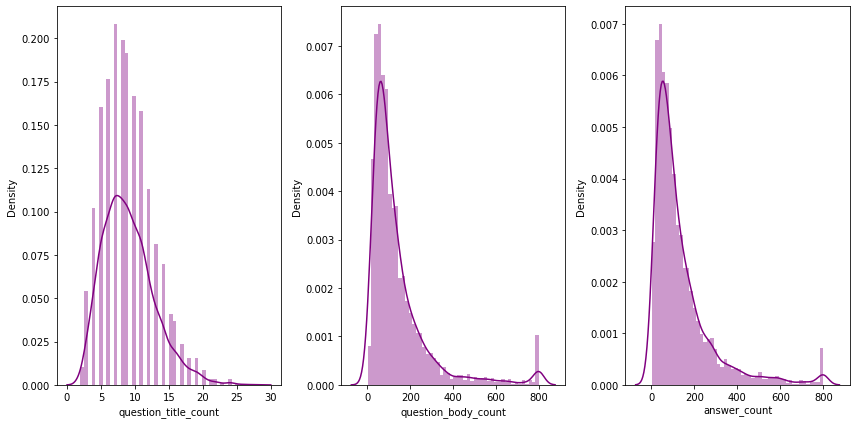

In [71]:
def word_count(sentence):
    return sentence.count(' ') + 1

df = pd.DataFrame()
df['question_title_count'] = train_data['question_title'].apply(word_count)
df['question_body_count'] = train_data['question_body'].apply(word_count)
df['answer_count'] = train_data['answer'].apply(word_count)

# change outlier values for display
df['question_body_count'].clip(0, 800, inplace=True)
df['answer_count'].clip(0, 800, inplace=True) 

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
sns.distplot(df['question_title_count'], color='purple', ax=axes[0])
sns.distplot(df['question_body_count'], color='purple', ax=axes[1])
sns.distplot(df['answer_count'], color='purple', ax=axes[2])

plt.tight_layout()
plt.show()
plt.close()

**Now what's the correlation between targets and features (number of words in answer, etc)? Let's have a basic sense first.**

<AxesSubplot:>

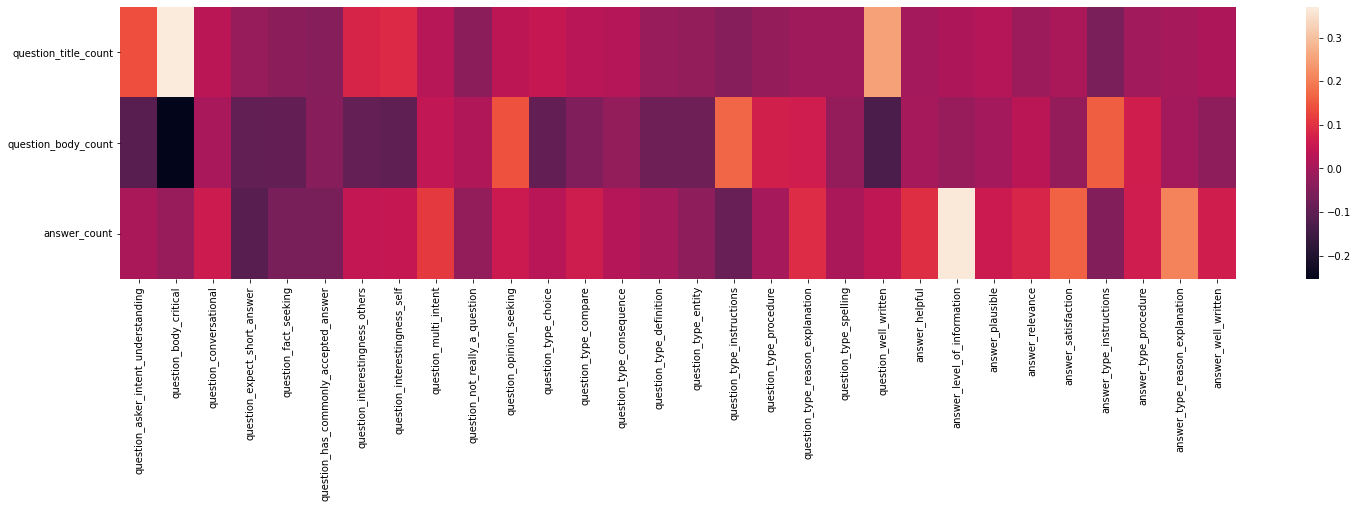

In [75]:
from scipy.spatial.distance import cdist

index_cols = ['question_title_count', 'question_body_count', 'answer_count']
XA = df.values.T
XB = train_data[target_cols].values.T
cor = pd.DataFrame(1 - cdist(XA, XB, metric='correlation'), index=index_cols, columns=target_cols)

fig, ax = plt.subplots(figsize=(25, 5))
sns.heatmap(cor, ax=ax)

# Part III - Data Preprocessing

**Let's prepare the input for BERT. We should first tokenize the data, truncate and pad a sentense, and then generate the attention mask for each sentence.**

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, optimizers
from transformers import BertTokenizer
from tqdm import tqdm

MAX_LEN = 128
def preprocess(data):
    def fill_result_array(text, result_array):
        encoded_dict = tokenizer.encode_plus(text, truncation=True, padding='max_length', max_length=MAX_LEN)
        input_ids = encoded_dict['input_ids']
        attention_mask = encoded_dict['attention_mask']
        result_array[0].append(input_ids)
        result_array[1].append(attention_mask)
        
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    inputs_question, inputs_answer = [[] for _ in range(2)], [[] for _ in range(2)]
    for _, item in tqdm(data.iterrows()):
        title, question, answer = item
        fill_result_array(title + ' ' + question, inputs_question)
        fill_result_array(answer, inputs_answer)
    inputs = tf.concat([tf.constant(inputs_question), tf.constant(inputs_answer)], 0) # axis=0
        
    return inputs

inputs = preprocess(train_data[feature_cols])

6079it [00:36, 166.37it/s]


In [82]:
print('input_ids for questions:', inputs[0][3])
print('attention_masks for questions:', inputs[1][3])

input_ids for questions: tf.Tensor(
[  101  2064  2019 21358  8873 29045  4183  2022  2109  1999 28236 11586
  1029  2019 21358  8873 29045  4183  1010  2013  2054  1045  3305  1010
  2003 10468  1037  2772  6254  2445  2011  1037  7409  2000  2022  2109
  2004  3350  1999  1037  3979  1010  2302  1996  7409  3209 11303  2000
  2202  1037  3233  1012  2064  2019 21358  8873 29045  4183  2022  2109
  1999 28236 11586  1029  2030  2442  9390  2202  1996  3233  1999  2711
  2005  2037 10896  2000  4175  1029  1006  1999  2553  1045  1005  1049
 24216  2054  3599  2019 21358  8873 29045  4183  2003  1010  3432  7438
  2009  2004  1037  2772  6254  2011  1037  7409  2007  2037 10896  1012
  1007   102     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0], shape=(128,), dtype=int32)
attention_masks for questions: tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

**Since we are unable to use test data, we need to split the training data into training, validation, and testing data.**

In [71]:
target = tf.constant(train_data[target_cols])
train_x, valid_x, test_x = inputs[:, :5000, :], inputs[:, 5000:5500, :], inputs[:, 5500:, :]
train_y, valid_y, test_y = target[:5000, :], target[5000:5500, :], target[5500:, :]

# Part IV - Model

**The model is based on BERT. It leverage BERT as an embedding layer and then summarize its infomation to make predictions.**

In [6]:
from transformers import TFBertModel

def build_model():
    # input layers
    id_question = layers.Input((MAX_LEN,), dtype=tf.int32) 
    mask_question = layers.Input((MAX_LEN,), dtype=tf.int32)
    id_answer = layers.Input((MAX_LEN,), dtype=tf.int32)    
    mask_answer =  layers.Input((MAX_LEN,), dtype=tf.int32)
    # embedding layers
    encoder = TFBertModel.from_pretrained('bert-base-uncased')
    embedded_question = encoder(id_question, attention_mask=mask_question)[0] # last-hidden-state: (batch, max_len, hidden_size)
    embedded_answer = encoder(id_answer, attention_mask=mask_answer)[0]
    # Dense layers
    question_info_sum = layers.GlobalAveragePooling1D()(embedded_question) # (batch, hidden_size)
    answer_info_sum = layers.GlobalAveragePooling1D()(embedded_answer)
    info = layers.Concatenate()([question_info_sum, answer_info_sum])
    outputs = layers.Dropout(0.25)(info)   
    outputs = layers.Dense(30, activation='sigmoid')(outputs)

    model = models.Model(inputs=[id_question, mask_question, id_answer, mask_answer], outputs=outputs)
    return model

model = build_model()
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 128)]        0                                            
_______________________________________________________________________________________

# Part V - Training

**I need to implement the spearman's r since it's not in Keras.**

**The formula is as follows:**

$$
r_s = \frac{cov(rg_x,rg_y)}{\sigma_{rgx}\sigma_{rgy}}
$$

**Since we have multiple labels, we need to do column-wise mean of spearman's r. There are some columns that has all 0 values which result in a NaN, so I'll just ignore these values.**

In [7]:
from scipy.stats import spearmanr
import numpy as np

class SpearmanRhoCallback(callbacks.Callback):
    def __init__(self, valid_x, valid_y):
        self.x = valid_x
        self.y = valid_y
    
    def on_epoch_end(self, epoch, logs):
        y_pred = self.model.predict(self.x)       
        batch_size, feature_size = self.y.shape
        r_vals = []
        for i in tqdm(range(feature_size)):
            r = spearmanr(self.y[:, i], y_pred[:, i]).correlation
            if not np.isnan(r):
                r_vals.append(r)
        rho_val = np.mean(r_vals)
        print('spearman-rho: %s\n' % (str(round(rho_val, 4))))
        return rho_val

**Let's define some useful callbacks.**

In [69]:
def exponential_decay_fn(epoch):
    return 1e-5 * 0.1**(epoch / 10)

early_stopping_cb = callbacks.EarlyStopping(patience=3, restore_best_weights=True) # wait for 3 epoch if validation goes down
lr_scheduler_cb = callbacks.LearningRateScheduler(exponential_decay_fn)
rho_cb = SpearmanRhoCallback([valid_x[0], valid_x[1], valid_x[2], valid_x[3]], valid_y)

**I'm using binary_crossentropy as the loss function because it's a multilabel classification problem. The activation function for the output layer will be sigmoid instead of softmax. The formula is as follows:**

$$
H(p)_q = \frac{1}{N}\sum plog(q) + (1-p)log(1-q)
$$

In [72]:
# I'm going to train 10 epochs
optimizer = optimizers.Adam(learning_rate=1e-5) # lr is tunable here
model.compile(loss='binary_crossentropy', \
              optimizer=optimizer)
history = model.fit([train_x[0],train_x[1],train_x[2],train_x[3]], \
                    train_y, \
                    validation_data=([valid_x[0], valid_x[1], valid_x[2], valid_x[3]], valid_y), \
                    callbacks=[rho_cb, early_stopping_cb, lr_scheduler_cb], \
                    epochs=10, \
                    batch_size=3)

Epoch 1/10
1667/1667 [==============================] - ETA: 0s - loss: 0.3491

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1074.11it/s]


spearman-rho: 0.392

1667/1667 [==============================] - 837s 502ms/step - loss: 0.3491 - val_loss: 0.3703
Epoch 2/10
1667/1667 [==============================] - ETA: 0s - loss: 0.3355

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 941.23it/s]

spearman-rho: 0.3837

1667/1667 [==============================] - 847s 508ms/step - loss: 0.3355 - val_loss: 0.3746


Epoch 3/10
1667/1667 [==============================] - ETA: 0s - loss: 0.3233

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 812.98it/s]

spearman-rho: 0.3784

1667/1667 [==============================] - 803s 482ms/step - loss: 0.3233 - val_loss: 0.3807


Epoch 4/10
1667/1667 [==============================] - ETA: 0s - loss: 0.3131

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 812.96it/s]


spearman-rho: 0.3746

1667/1667 [==============================] - 713s 428ms/step - loss: 0.3131 - val_loss: 0.3864


# Part VI - Evaluation

**Let's plot the model loss history to see how it was moving.**

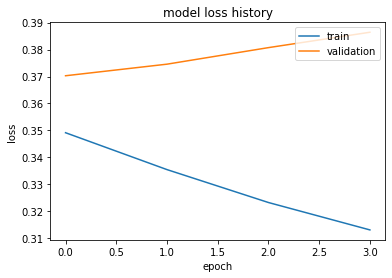

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**I'm still using the Spearman's Rho as the evaluation metric, but without using callbacks here.** 

In [74]:
def evaluate(model, x, y):
    y_pred = model.predict(x)       
    batch_size, feature_size = y.shape
    r_vals = []
    for i in tqdm(range(feature_size)):
        r = spearmanr(y[:, i], y_pred[:, i]).correlation
        if not np.isnan(r):
            r_vals.append(r)
    rho_val = np.mean(r_vals)
    return round(rho_val, 4)

rho_eval = evaluate(model, [test_x[0], test_x[1], test_x[2], test_x[3]], test_y)
print('test score:', rho_eval)

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 970.61it/s]

test score: 0.383


**Now let's look into one example to see what the prediction tell us.**

In [75]:
pred = model.predict([test_x[0], test_x[1], test_x[2], test_x[3]])

In [44]:
print('question_title:\n', train_data.iloc[-1]['question_title'])
print('question_body:\n', train_data.iloc[-1]['question_body'])
print('answer:\n', train_data.iloc[-1]['answer'])

question_title:
 Why are there so many different types of screws (phillps/flat/hex/star/etc)?
question_body:
 Newbie question.

Why is it that there's a bazillion different types of screws? Why can't we just always use one standard screw type? Are there advantages/disadvantages to the different types? Are there times when one type is preferred over another?

Help me understand why there isn't one screw to rule them all.

answer:
 First, I really like Eric's answer for practical reasons.  But there is another side to screw head diversity:  Security.

In the end, it's usually a temporary measure.  Once a company invents a new screw, some third party will start selling tools to remove them.  But for a time, any new screw design means the only people who can open your parts are "certified" workshops you've given tools to.  Personally I see this a lot in electronic equipment, where the original manufacturer wants some aspect of design kept private or doesn't want after-market mods made to t

**We can see that most values are very close. Yeah!**

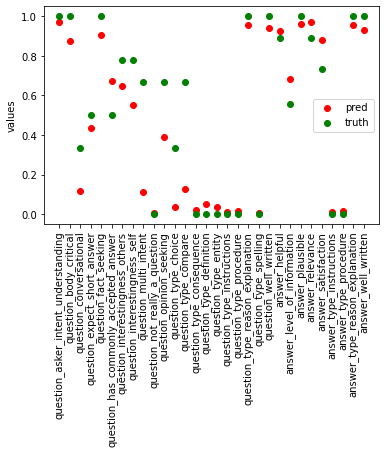

In [76]:
plt.scatter(target_cols, pred[-1], label='pred', color='r')
plt.scatter(target_cols, test_y[-1], label='truth', color='g')
plt.ylabel('values')
plt.legend()
plt.xticks(rotation=90)
plt.show()